<a href="https://colab.research.google.com/github/vk18mishra/Multilingual-Landscaping-in-Dortmund-Nordstadt/blob/main/RMEL_Project_Landscaping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multilingual Landscaping for RMEL**

## **Installing unavailable packages**

In [ ]:
!pip install tqdm
!pip install easyocr opencv-python
!pip uninstall opencv-python-headless==4.5.5.62
!pip install opencv-python-headless==4.5.2.52

## **Importing required libraries**

In [2]:
import os
from tqdm import tqdm
from os import listdir
from os.path import isfile, join
from easyocr import Reader
import argparse
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import math
import pandas as pd
import numpy as np

## **Getting Image Names from the directory**

In [3]:
onlyfiles = [f for f in listdir("/content/drive/MyDrive/RMEL PROJECT") if isfile(join("/content/drive/MyDrive/RMEL PROJECT", f))]
print("Total Number of Images: ",len(onlyfiles))

89

## **Resizing the Images to 1280x720 and compressing them**

In [5]:
for img_name in tqdm(onlyfiles):
  image_nm = "/content/drive/MyDrive/RMEL PROJECT/"+img_name
  foo = Image.open(image_nm)
  x, y = foo.size
  #print("Original File Size: ",os.stat("/content/drive/MyDrive/RMEL PROJECT/IMG_20220128_173721.jpg").st_size)
  #print(x,y)
  x2, y2 = 1280,720 #math.floor(x-2500), math.floor(y-2000)
  #print(x2,y2)
  foo = foo.resize((x2,y2),Image.ANTIALIAS)
  image_dest = "/content/drive/MyDrive/RMEL PROJECT/Compressed/"+img_name
  foo.save(image_dest,quality=40)
  #print("Compressed File Size: ",os.stat("/content/drive/MyDrive/RMEL PROJECT/Compressed/IMG_20220128_173721.jpg").st_size)

100%|██████████| 89/89 [01:45<00:00,  1.19s/it]


## **Performing OCR on the Compressed Images**

In [7]:
#langs = "de,ar,tr,en"
langs1 = ["en","tr","de"]#langs.split(",")
print("[INFO] Using the following languages: {}".format(langs1))
print("[INFO] Performing OCR on the input Images...")
reader1 = Reader(langs1, gpu=True)
results1 = []
for img_name in tqdm(onlyfiles):
  image_nm = "/content/drive/MyDrive/RMEL PROJECT/Compressed/"+img_name
  #image = "/content/drive/MyDrive/RMEL PROJECT/Compressed/IMG_20220128_173721.jpg"

  #langs2 = ["ar"]
  #langs = ["en","tr","de","ar"]
  image = cv2.imread(image_nm)
  #reader2 = Reader(langs2, gpu=False)
  results_temp = reader1.readtext(image)
  results1.append(results_temp)
  #results2 = reader2.readtext(image)

[INFO] Using the following languages: ['en', 'tr', 'de']
[INFO] Performing OCR on the input Images...


100%|██████████| 89/89 [00:39<00:00,  2.24it/s]


## **Creating the Final Dataframe - Image to Text**

In [13]:
main_list_text = []
for img_fn in tqdm(results1):
  list_text = []
  for (bbox, text, prob) in img_fn:
    if(text in ["AI QUAD CAMERA", "REDMI NOTE 8 PRO", "REDMI", "NOTE", "ReDMINnOTE 8 PRO"
                "8", "PRO", "REDM", "Al QUAD GAMERA", "AI", "QUAD", "AlQUAD CAMERA" 
                "CAMERA", "QUADCAMERA", "Al QUADCAMERA", "NOTE 8 PRO"]):
      continue  
    list_text.append(text)

  main_list_text.append(list_text)
df1 = {
  'Image Name':onlyfiles,
  'Text':main_list_text}

df1 = pd.DataFrame(df1,columns=['Image Name','Text'])

df1.head()

100%|██████████| 89/89 [00:00<00:00, 113462.93it/s]


,Image Name,Text
0,IMG_20220128_174011.jpg,"[1, 757, 4, 2, Ei32e22152523 =ğ2, 3, @f, 9;, 2..."
1,IMG_20220128_173838.jpg,"[DÖNER, GRILL, 6RILI, ""PIZZA LAHMACUN, SALATE,..."
2,IMG_20220128_173721.jpg,"[s, CAGLAR, DAMEN, HERREN, SALOM, P, EN]"
3,IMG_20220128_173405.jpg,"[9?, OURFACI, Rusumcu, REDMI NoTE 8 PRo, Al QU..."
4,IMG_20220128_173346.jpg,"[(Lasrene, Konyelıfş, Fralslerladen, PElhe, Si..."


## **Saving the results in a CSV**

In [14]:
df1.to_csv('ImagetoText.csv')

## **Working Example**

In [22]:
img_name = onlyfiles[24]
image_nm = "/content/drive/MyDrive/RMEL PROJECT/Compressed/"+img_name
image = cv2.imread(image_nm)
results_temp = reader1.readtext(image)

[INFO] 0.614989: Anmopische Habesha Restaurant
[INFO] 0.976899: Eritreishe
[INFO] 0.107124: 8"
[INFO] 0.028960: Ankan
[INFO] 0.031120: P"' ' -
[INFO] 0.115112: S
[INFO] 0.829836: Tel-015214827460
[INFO] 0.379743: AdresseMunsterstrane
[INFO] 0.996163: 01729513478
[INFO] 0.998474: 44145 Dortmund
[INFO] 0.946818: 'BENA
[INFO] 0.003041: GiA6ESGG
[INFO] 0.470102: Incra
[INFO] 0.295656: ReDMINnOTE 8 PRO
[INFO] 0.748336: AlQUAD CAMERA
[INFO] 0.777724: ud


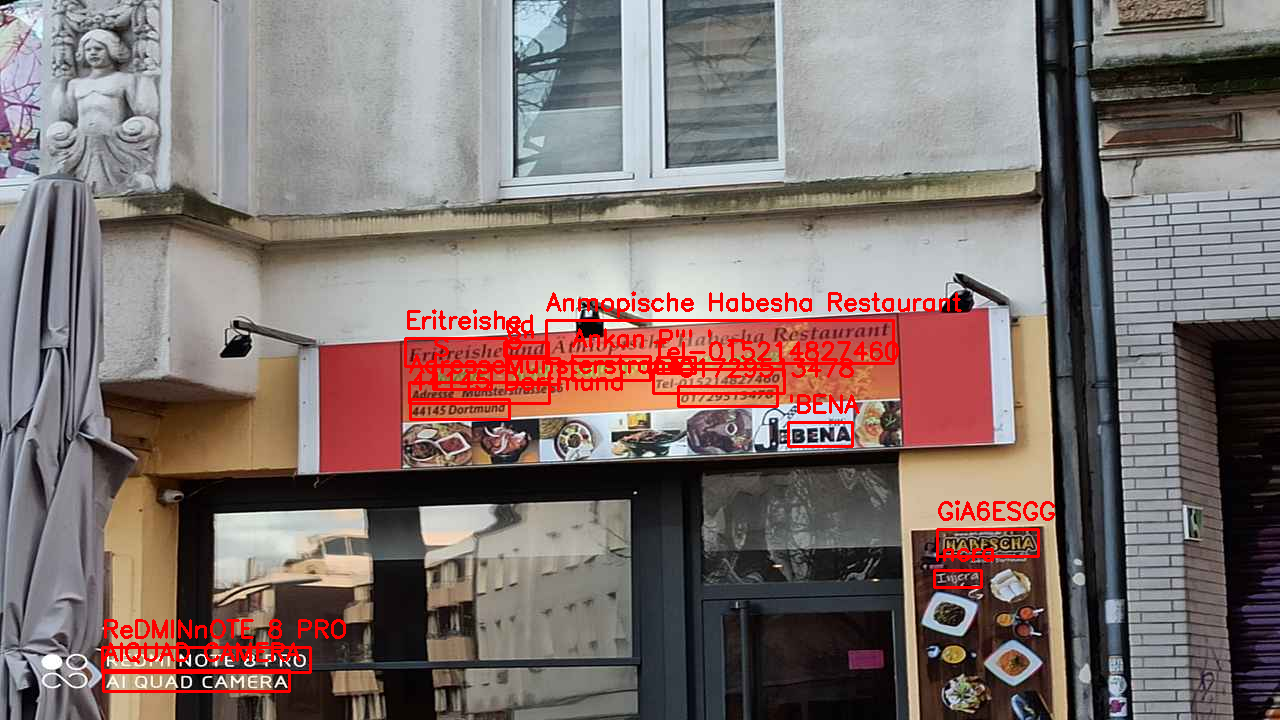

In [23]:
for (bbox, text, prob) in results_temp:
  print("[INFO] {:4f}: {}".format(prob,text))
  (top_left, top_right, bottom_right, bottom_left) = bbox

  tl = (int(top_left[0]), int(top_left[1]))
  tr = (int(top_right[0]), int(top_right[1]))
  br = (int(bottom_right[0]), int(bottom_right[1]))
  bl = (int(bottom_left[0]), int(bottom_left[1]))

  cv2.rectangle(image, tl, br, (0, 0, 255), 2)
  cv2.putText(image, text, (tl[0], tl[1] - 10),
              cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

# image_nm = "/content/drive/MyDrive/RMEL PROJECT/Compressed/"+onlyfiles[88]
# image = cv2.imread(image_nm)
cv2_imshow(image)
#cv2.waitKey(0)

In [28]:
list_text = []
for (bbox, text, prob) in results_temp:
  if(text in ["AI QUAD CAMERA", "REDMI NOTE 8 PRO", "REDMI", "NOTE", "ReDMINnOTE 8 PRO",
              "8", "PRO", "REDM", "Al QUAD GAMERA", "AI", "QUAD", "AlQUAD CAMERA", 
              "CAMERA", "QUADCAMERA", "Al QUADCAMERA", "NOTE 8 PRO"]):
    continue  
  list_text.append(text)

df_temp = {
  'Image Name':onlyfiles[24],
  'Text':list_text}

df_temp = pd.DataFrame(df_temp,columns=['Image Name','Text'])

df_temp

,Image Name,Text
0,IMG_20220128_162302.jpg,Anmopische Habesha Restaurant
1,IMG_20220128_162302.jpg,Eritreishe
2,IMG_20220128_162302.jpg,"8"""
3,IMG_20220128_162302.jpg,Ankan
4,IMG_20220128_162302.jpg,"P""' ' -"
5,IMG_20220128_162302.jpg,S
6,IMG_20220128_162302.jpg,Tel-015214827460
7,IMG_20220128_162302.jpg,AdresseMunsterstrane
8,IMG_20220128_162302.jpg,01729513478
9,IMG_20220128_162302.jpg,44145 Dortmund
